In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Upload file
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

# After uploading, check the files in the directory
import os
print("Files in the directory:", os.listdir('/content'))

# Load dataset
hr_data = pd.read_csv('/content/HR_comma_sep.csv')  # Use the correct path after upload

# Display first few rows
print(hr_data.head())

# Check for missing values
print("\nMissing values:\n", hr_data.isnull().sum())

# Check data types and unique values
print("\nData Types:\n", hr_data.dtypes)
print("\nUnique values in categorical columns:\n", hr_data.select_dtypes(include=['object']).nunique())


Saving HR_comma_sep.csv to HR_comma_sep.csv
Files in the directory: ['.config', 'HR_comma_sep.csv', 'zoo-data (6).csv', 'zoo-class-type (6).csv', 'zoo-class-type (5).csv', 'zoo-data (4).csv', 'zoo-class-type.csv', 'zoo-class-type (1).csv', 'zoo-class-type (2).csv', 'zoo-data (1).csv', 'zoo-data (2).csv', 'zoo-class-type (3).csv', 'zoo-data.csv', 'zoo-data (5).csv', 'zoo-class-type (4).csv', 'zoo-data (3).csv', 'sample_data']
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0         

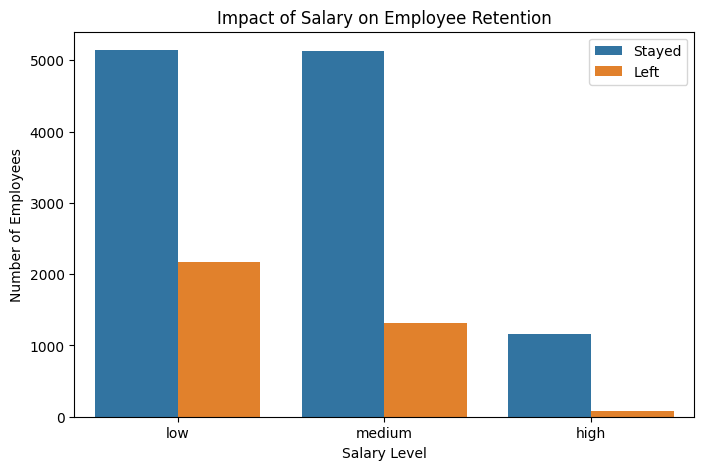

In [13]:
# Bar plot: Salary vs Employee Retention
plt.figure(figsize=(8,5))
sns.countplot(x="salary", hue="left", data=hr_data)
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.show()


In [15]:
# Selecting relevant features
features = ["satisfaction_level", "last_evaluation", "number_project",
            "average_montly_hours", "time_spend_company", "salary", "Department"]

# One-hot encode categorical features
X = pd.get_dummies(hr_data[features], drop_first=True)
y = hr_data["left"]  # Target variable: 1 (Left), 0 (Stayed)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Accuracy: 0.7610


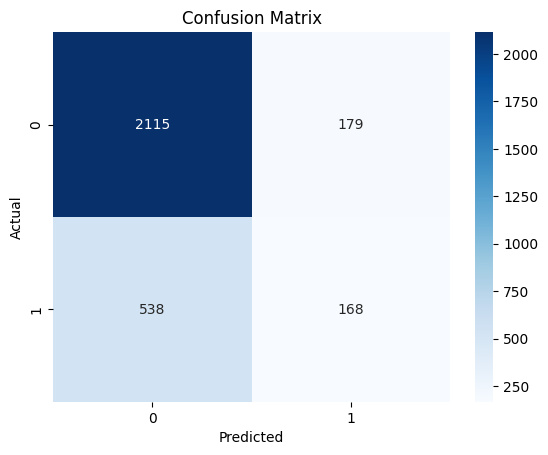

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.48      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



In [16]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Zoo Data:
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2        

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


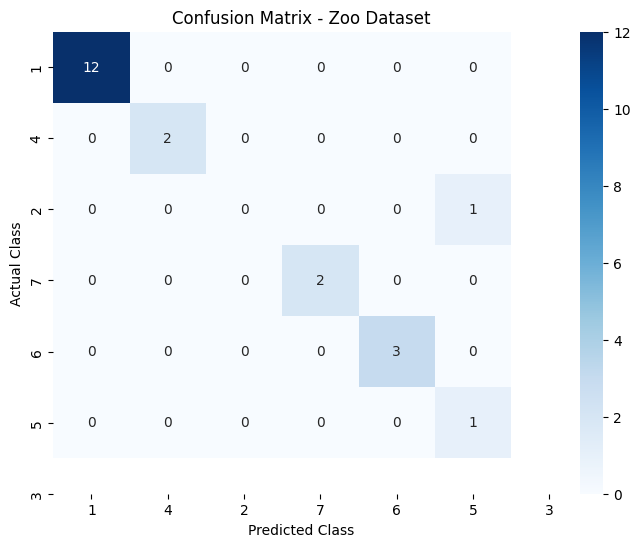


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
zoo_data = pd.read_csv("zoo-data.csv")
class_types = pd.read_csv("zoo-class-type.csv")

# Display first few rows of both datasets
print("Zoo Data:\n", zoo_data.head())
print("\nClass Type Data:\n", class_types.head())

# Merge datasets on 'class_type' if necessary
if "class_type" not in zoo_data.columns:
    print("\nError: 'class_type' column is missing in zoo-data.csv. Available columns: ", zoo_data.columns)
else:
    # Drop animal name column since it's not needed for classification
    X = zoo_data.drop(columns=["animal_name", "class_type"], errors="ignore")
    y = zoo_data["class_type"]

    # Print unique classes to check data integrity
    print("\nUnique class types:", y.unique())

    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardization (optional, logistic regression works fine without it)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Logistic Regression model
    model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title("Confusion Matrix - Zoo Dataset")
    plt.show()

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
